In [15]:
%matplotlib inline
import numpy as np;
import scipy;
import scipy.optimize;
import matplotlib
import matplotlib.pyplot as plt

/home/ben/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ben/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L11: Applications of Gradient Descent

*Tuesday, September 25, 2018*

### Recall:  Gradient Descent

Minimize an objective $f : \R^d \rightarrow \R$ by following the negative gradient direction:

$$
x_{t+1} = x_t - \eta_t \nabla f(x_t) 
$$

Last time, we proved the following convergence rate:

<div style="padding:20px;margin:20px;border:1px solid black">
<b>Theorem:</b> If $f : \R^d \rightarrow \R$ is convex, differentiable and L-Lipschitz on all of $\R^d$ and $||x_0 - x^*|| \leq R$ where $x^*$ is the global minimum, then there is a step size $\eta > 0$ such that the iterates of gradient descent satisfy
$$
f\left(\frac{1}{t}\sum_{i=0}^{t}x_i\right) - f(x^*) \leq \frac{R L}{\sqrt{t}}
$$
</div>

### Projected Gradient Descent

Suppose we want to minimize $f : \Omega \rightarrow \R$ within some convex set $\Omega \subset \R^d$ instead of the entire space $\R^d$.  We can still apply gradient descent as long as we **project** back onto the convex domain $\Omega$ after each iteration:

<div style="display:flex; justify-content:center; align-items:center; margin: 0 auto">
<img src="images/l10-projected-gd.png">
<div>
$$
\begin{align}
y_{t+1} &= x_t - \eta_t \grad f(x_t) \\
x_{t+1} &= \Pi_\Omega(y_{t+1})
\end{align}
$$
</div>
</div>
Here, $\Pi_\Omega(x) = \min_{z \in \Omega} \norm{z-x}_2^2$ projects onto the convex set $\Omega$.

<div style="padding:10px; margin:10px; border: 1px solid black">
<b>Problem:</b> Argue that Projected Gradient Descent achieves the same convergence rate by making a minor adjusment to the proof.
</div>

### Frank-Wolfe / Conditional Gradient

Let $f(x)$ be a $\beta$-smooth function, and assume we want to solve $\min_{x \in \Omega} f(x)$ for some constrained set $\Omega$ with diameter $D$. The *Frank-Wolfe* algorithm does the following:

+ Initialize $x_1$ to some arbitrary point in $\Omega$
+ For $t=1,2,\ldots, T$:
    + compute $v_t + \arg\min_{v \in \Omega} v^\top\nabla f(x_t)$
    + update $x_{t+1} = x_t + \eta_t (v_t - x_t)$
    
**Theorem**: after $T$ rounds of Frank-Wolfe, we have that
$$ f(x_t) - f(x^*) \leq \frac{2 \beta D^2}{t + 2}$$
for step size $\eta_t = 2/(t+2)$.

[more](http://fa.bianp.net/blog/2018/notes-on-the-frank-wolfe-algorithm-part-i/) [information](https://ee227c.github.io/notes/ee227c-lecture05.pdf)

# Strong Convexity & Smoothness

### Def:  Strongly Convex

Remember that a differentiable function $f : \Omega \rightarrow \R$ is convex iff it lies above its linear approximation at every point, that is,
    $$
    f(y) \geq f(x) + \inner{ \nabla f(x), y-x } \quad \forall\, x,y \in \Omega
    $$
    
A function is **$\alpha$-strongly convex** if it also lies above a *quadratic* approximation at every point, where $\alpha$ controls the steepness:
    $$
    f(y) \geq f(x) + \inner{ \nabla f(x), y-x } + \tfrac{\alpha}{2} \norm{y - x}^2
    $$

### Problem:  Second-Order Condition for Strong Convexity

**Reminder**: A function is **$\alpha$-strongly convex** if it lies above a *quadratic* approximation at every point, where $\alpha$ controls the steepness:
    $$
    f(y) \geq f(x) + \inner{ \nabla f(x), y-x } + \tfrac{\alpha}{2} \norm{y - x}^2
    $$

<div style="padding:10px;margin:10px;border: 1px solid black">
<b>Problem:</b> Show that if $f$ is twice-differentiable and $\alpha$-strongly convex, then $\nabla^2 f \succcurlyeq \alpha I$.
</div>

> *Hint:* First, show that $f$ is $\alpha$-strongly convex if and only if the function $g(x) = f(x) - \frac{\alpha}{2}\norm{x}_2^2$ is convex.  Then, use the second-order condition for convexity on $g$.
    

### Def:  $\beta$-Smoothness

A function $f : \Omega \rightarrow \R$ is $\beta$-smooth if it lies *below* a quadratic at each point:

$$
f(y) \leq f(x) + \inner{ \nabla f(x), y-x } + \tfrac{\beta}{2} \norm{y-x}_2^2
$$

Similarly to strong-convexity, a twice-differentiable function is $\beta$-smooth if and only if $\nabla^2 f(x) \preccurlyeq \beta I$ for all $x \in \Omega$.

### Problem:  Quadratic Forms

Let $A \in \R^{d \times d}$ be symmetric and positive-definite and define $f(x) = \frac{1}{2} x^T A x$.  

* Is $f$ smooth?  If so, with what smoothness constant?
* Is $f$ strongly convex?  If so, with what constant?


# Gradient Descent for Quadratic Forms

**Problem:** Gradient Descent for Quadratic Forms

Let $A \in \R^{n \times n}$ be a symmetric, positive definite matrix and consider the following quadratic objective $f: \R^n \rightarrow \R$:

$$
f(x) = \frac{1}{2} x^T A x - b^T x
$$

* For $n=2$, use `matplotlib` to plot the level sets of the objective.
* For simplicity, assume $A$ is diagonal with positive entries.  The diagonal entries are the eigenvalues of $A$.  How does the plot of $f$ change when the eigenvalues are larger / smaller?
* Implement gradient descent and show the locations of the iterates on your contour plot.  How do the convergence properties of gradient descent change when you vary the eigenvalues of $A$?

In [125]:
def plot_init():
    fig = plt.figure(figsize=(10,10));
    ax = fig.gca()
    return fig,ax;

def plot_quadratic(ax, A, b, xmin=-10, xmax=10):
    """
    Makes a contour plot of the quadratic form associated with A and b.
    @param (ax) The Axes object on which to plot.  See plot_init().
    @param (A) An NxN matrix.
    @param (b) A vector of length N.
    @param (xmin,xmax) Domain on which to evaluate the quadratic.
    """
    gridsize = 100;
    x1 = np.linspace(xmin,xmax,gridsize);
    x2 = np.linspace(xmin,xmax,gridsize);
    X1,X2 = np.meshgrid(x1,x2);
    # compute quadratic
    XX = np.stack((X1.flatten(), X2.flatten()));
    ZZ = np.sum(XX * (A @ XX), axis=0)
    ZZ = ZZ.reshape(gridsize, gridsize);
    # contour plot
    plt.contour(X1, X2, ZZ, 50);

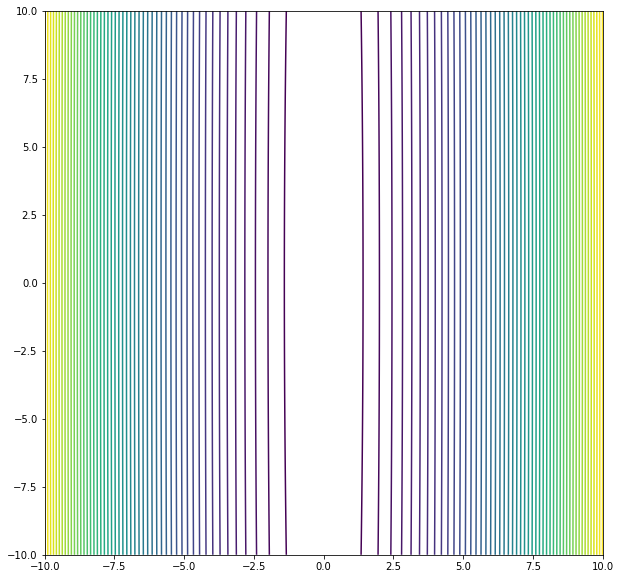

In [126]:
A = np.diag([10,0.02])
b = np.zeros(2);

fig,ax = plot_init();
plot_quadratic(ax,A,b)

# Computing Eigenvectors

Let $A \in \R^{m \times m}$ be a Hermitian matrix.  The **Rayleigh quotient** is
    $$
    R(x) = \frac{x^T A x}{x^T x}
    $$
    
On Homework #1, you proved that the stationary points $(\nabla R(x) = 0)$ of $R$ are the eigenvectors of $A$.  Furthermore, if $Av = \lambda v$, then $R(v) = \lambda$ is the corresponding eigenvalue.  So, we should be able to use gradient descent to find eigenvalue/eigenvector pairs, right?

**Problem:  Computing Eigenvalues**

* What is the global minimum of $R(x)$?  What is the global maximum?
    * (if this is too easy for you, look up the [Courant-Fischer](https://en.wikipedia.org/wiki/Min-max_theorem) theorem)
* You've already shown that the gradient is $\nabla R(x) = \frac{2}{x^T x} (Ax - R(x) x)$.  Describe the dynamics of gradient descent when applied to $R(x)$.
* Do you think the stationary points of $R(x)$ local maxima/minima?  Why or why not?
* Is this a reliable way to find eigenvectors?

# Non-convex Optimization

If the objective is non-convex, gradient descent will converge to a **local minimum**, provided that the objective is bounded below.  Convergence rates are complicated and generally unknown.

**Problem:**  Gradient Descent for Non-convex Optimization

* Have a look at Wikipedia's [list of test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization).  Pick one that you think looks interesting and write a function to compute its value in Python.  
* Make a countour plot of the function like we did above for quadratics.
* Try to write down an expression for the gradient of your function.  If this is too complicated, try using a [finite difference approximation](https://en.wikipedia.org/wiki/Finite_difference) of the gradient,
    $$
    \grad f(x) \approx \frac{f(x+h)-f(x)}{h} \quad \text{for small } h \in \R
    $$
* Plot a few iterations of gradient descent from a random initial point.
* How does the step size affect convergence?  Experiment with non-constant step sizes, line search, etc..

**Example:** The *Rosenbrock function* can be evaluated with `scipy`:
* To evaluate the Rosenbrock function, use [scipy.optimize.rosen](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.rosen.html)
* For the derivative, use [scipy.optimize.rosen_der](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.rosen_der.html#scipy.optimize.rosen_der)

In [123]:
def plot_rosen(ax, xmin, xmax):
    gridsize = 100;
    x1 = np.linspace(xmin,xmax,gridsize);
    x2 = np.linspace(xmin*10,xmax*10,gridsize);
    X1,X2 = np.meshgrid(x1,x2);
    # compute quadratic
    XX = np.stack((X1.flatten(), X2.flatten()));
    ZZ = scipy.optimize.rosen(XX)
    ZZ = ZZ.reshape(gridsize, gridsize);
    # contour plot
    plt.contour(X1, X2, ZZ, 50);

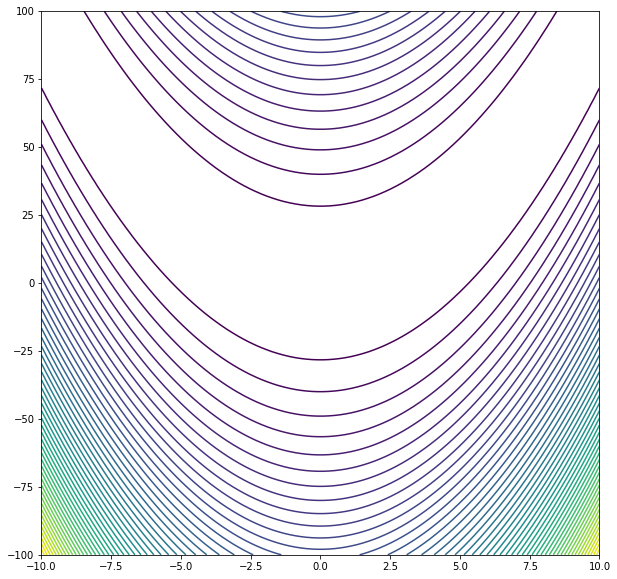

In [124]:
fig,ax = plot_init();
plot_rosen(ax, -10,10);

# Nonlinear Systems of Equations

You've already seen that gradient descent applied to a quadratic form can be used to solve *linear* systems of equations.  What about **nonlinear** systems of equations?

$$
\begin{align*}
f_1(x_1,\dots,x_n) &= 0 \\
f_2(x_1,\dots,x_n) &= 0 \\
\vdots &         \\
f_m(x_1,\dots,x_n) &= 0
\end{align*}
$$

One particularly cool place where nonlinear systems of equations show up is in **inverse kinematics**.  I won't go into the details here, but here are a few links:

* Alan Zucconi, ["Inverse Kinematics for Robot Arms"](https://www.alanzucconi.com/2017/04/10/robotic-arms/)
* https://homes.cs.washington.edu/~todorov/courses/cseP590/06_JacobianMethods.pdf
* https://cseweb.ucsd.edu/classes/sp16/cse169-a/slides/CSE169_08.pdf

One (very very bad) way to solve IK problems is with gradient descent. 
* Write a function $f(\theta_1,\dots,\theta_n)$ which, given the angles $\theta_1,\dots,\theta_n$ of each arm, computes the distance from the end effector to the target position.
* Estimate the derivative numerically with a finite difference quotient.
* Apply gradient descent to find the angles that will position the arm in the correct place!